In [3]:
#loading all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import math
import warnings
import scipy
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
print(sns.__version__)

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


0.11.0


In [4]:
#reading data to dataframe
df_train = pd.read_csv('./dataSet/train.csv')


In [3]:
#display all the info of the features of training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

There are 900,000 rows (instances) with 30 features and one target variable.
Usually represented as $X_{nxp}$ where n = 900000 and p = 32
1. There is also no null value.
2.One object dtype (maybe no categorical).
Separating into different variables

In [3]:
#selecting different types of data in different dfs
integer = df_train.select_dtypes(int)
integer = integer.drop(['id'], axis =1)
integer.attrs['name'] = "integer" 
continuous = df_train.select_dtypes(float)
continuous.attrs['name'] = "continuous" #associating the name attribute to datase

word = df_train.select_dtypes(object)
word.attrs['name'] = "word"


In [4]:
df_train.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


## Plotting different features

In [5]:

def plotFeatures(dataset, cols = 3):
    rows = math.ceil(dataset.shape[1]/cols)
    print (rows)
    fig, ax = plt.subplots(rows,cols, figsize = (15,15))
    ax = ax.flatten()
    for i, col in enumerate(dataset.columns):
        if dataset.attrs['name']== "integer":
            sns.countplot(x=dataset[col], data = dataset, ax = ax[i], hue = "target")
        if dataset.attrs['name']=="continuous":
            sns.histplot(data = dataset, x = dataset[col], hue =integer["target"],stat ='count', ax = ax[i])
            

5


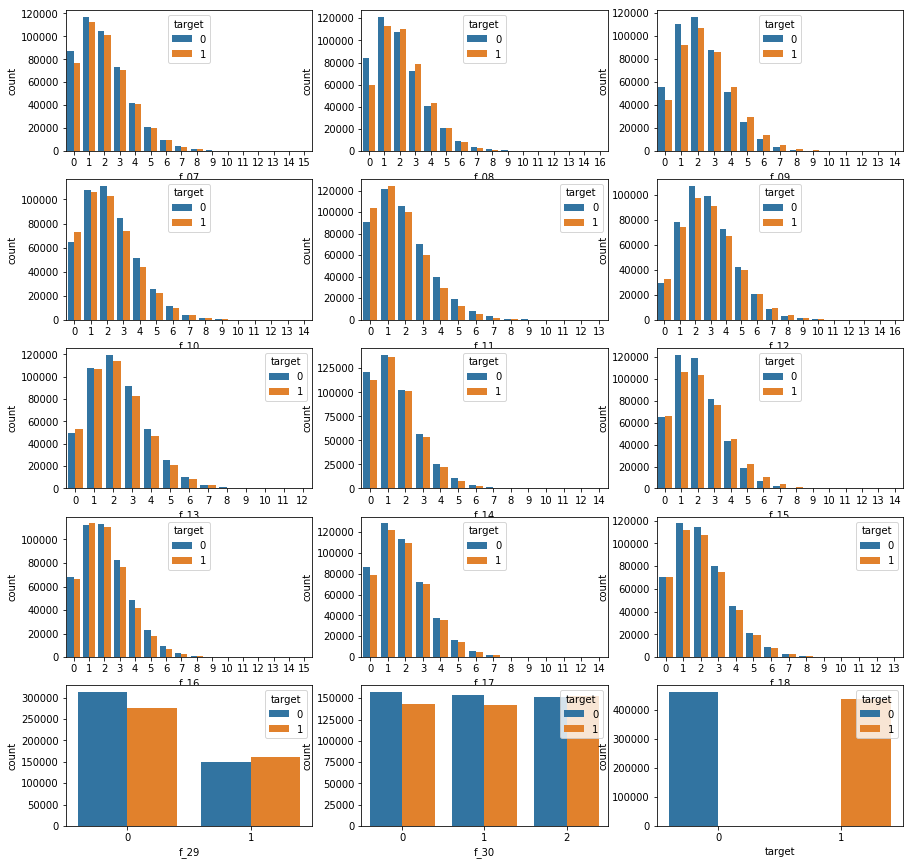

In [6]:
#Checking how the integer variable looks like.
plotFeatures(integer, cols = 3)


### Insights
* most of the features vary from 0 to 8 mostly. 
* They have simiar behavior increase till the 2-3 and then start to decrease. 
* f_29 and f_30 have 2/3 discrete values making a ordinal categorical dataset.

6


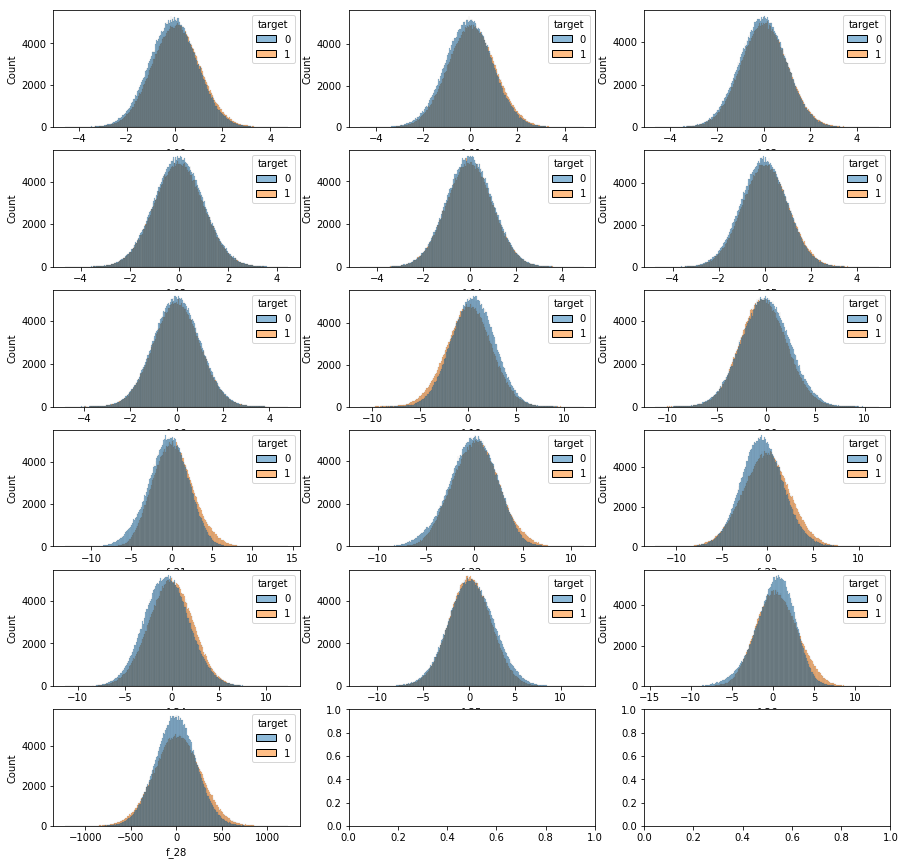

In [7]:
#Cheking how the continuous variable looks like 
plotFeatures(continuous, cols = 3)

# Observations:

* Normal distributions, symetrical around mean of 0.
* The distributions have different scales (different standard deviations)

* all the features have continuous behavior ranging from -4 to +4 until f_05 then it spans from -10 to +10 and for f_28 it spans from -1000 to +1000.

1.It is hence, important to scale te f_28


adding the boxplot for all the features with the target. 
Also relation between the target and the features (which we can see it is either  or 1 ) The information from the boxplot for feature and target should suffice

IndexError: index 30 is out of bounds for axis 0 with size 30

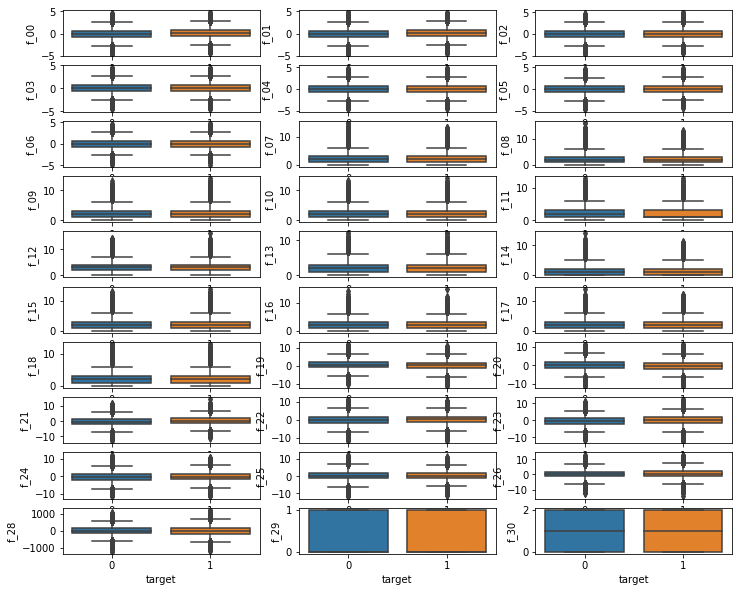

In [8]:
dfIntFloat = df_train.drop(['id', 'f_27'], axis = 1)
#dfIntFloat.head()
fig, ax = plt.subplots(10,3, figsize = (12,10))
ax = ax.flatten()
for i, col in enumerate(dfIntFloat.columns):
    sns.boxplot(data = dfIntFloat, x = "target", y = col, ax = ax[i])

* f_29, f_30 ranges from 0-1 and 0-2 respectively. 
* other replicate what we saw from the histo

In [9]:
# number of target values.
df_train['target'].value_counts()

0    462161
1    437839
Name: target, dtype: int64

Text(0.5, 1.0, 'Correlation heatmap')

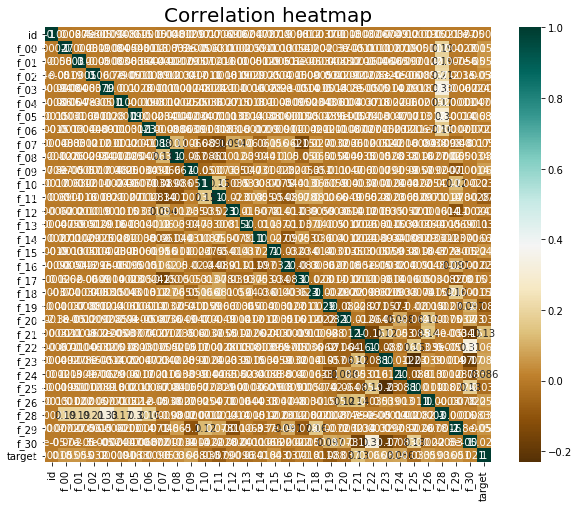

In [10]:
#Looking at the correlation amongs the features
plt.figure(figsize = (10,8))
sns.heatmap(df_train.corr(), cmap ='BrBG', annot = True)#, vmin = -1, vmax = 1,annot = True)
plt.title('Correlation heatmap',fontdict={'fontsize':20})


In [ ]:
#sns.pairplot(data= dfIntFloat.sample(10000), diag_kind='kde',hue = "target")

* We notice that all the features are -vely correlated except a couple of features which has small +ve correl
f_28 is strongly correlated with f_00 - f_06

## Looking at the f_27 

In [20]:
#word.value_counts()

In [11]:
import string

In [12]:
alphabet_upper = list(string.ascii_uppercase)

char_counts = []
#char_counts_test = []
for character in alphabet_upper:
    char_counts.append(df_train["f_27"].str.count(character).sum())
    #char_counts_test.append(df_test["f_27"].str.count(character).sum())

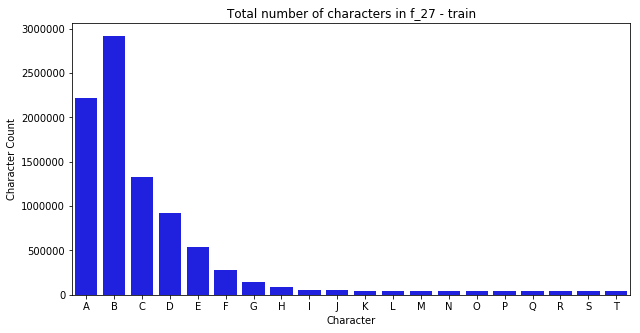

In [13]:
char_counts_df = pd.DataFrame({"Character": alphabet_upper, "Character Count": char_counts})
char_counts_df = char_counts_df.loc[char_counts_df["Character Count"] > 0]
#print(np.sum(char_counts))
#char_counts_testdf = pd.DataFrame({"Character": alphabet_upper, "Character Count": char_counts_test})
#char_counts_testdf = char_counts_testdf.loc[char_counts_testdf["Character Count"] > 0]

#No other hidden characters

plt.subplots(figsize=(10,5))
sns.barplot(data = char_counts_df, x="Character", y="Character Count", color="blue");
plt.title("Total number of characters in f_27 - train");

### Insights
* there are alphabet from A - T 
* A and B have occured more

In [14]:
char_counts_df = char_counts_df.set_index("Character", drop = False)
#char_counts_testdf = char_counts_testdf.set_index("Character", drop = False)

In [15]:
for i in range(10):
    char_counts_df["character"+str(i+1)] = df_train["f_27"].str[i].value_counts()
char_counts_df = char_counts_df.fillna(0)
#char_counts_df
#char_counts_testdf.head()


* Looking at the table above. We see there character1, 3 and 6 just has A/B . character 8 has all the letter equally spread.

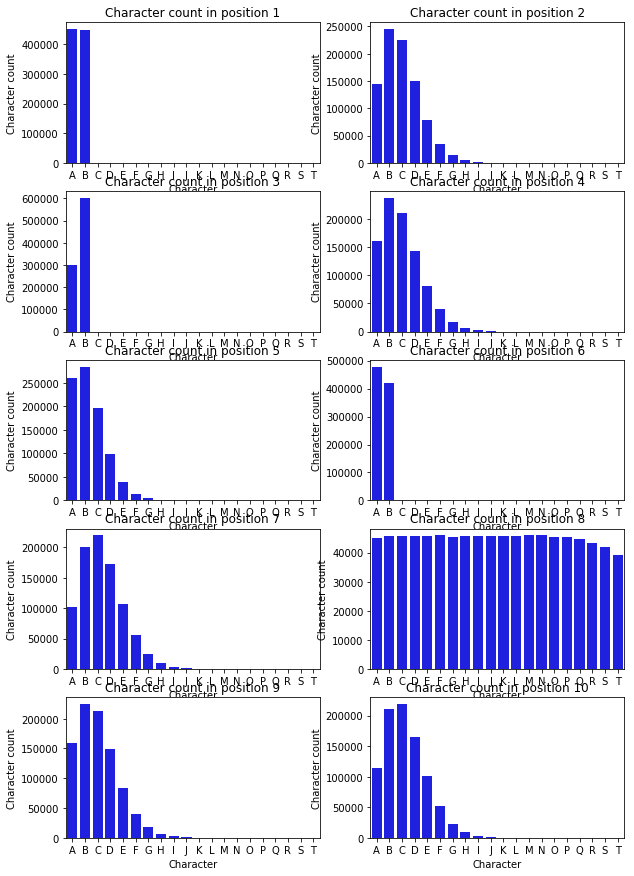

In [17]:
cols = 2
rows = math.ceil(char_counts_df.shape[1]/cols)
#print (rows)
fig, ax = plt.subplots(rows-1,cols, figsize = (10,15))
ax = ax.flatten()
character_cols = [i for i in char_counts_df.columns if "character" in i]
for i, col in enumerate(character_cols):
    #print(col)
    ax[i] = sns.barplot(x="Character", data = char_counts_df, y = col,ax = ax[i], color = "blue");
    ax[i].set_title("Character count in position "+str(i+1))
    ax[i].set_ylabel("Character count")
    

* in the ord the ord ('A') is not same as ord ('a') . each alphabet is denoted by the unicode. 

In [ ]:
ord('A')

65

In [ ]:
#For example if look at the positioning of the character wrt A
#df["f_31"] = df["f_27"].str[0].apply(lambda x : ord(x) - ord("A"))

In [ ]:
#number of unique characters
#p = df["f_27"].apply(lambda x :len(set(x)))
#p

# Feature Engineering - f_27

In [8]:
def feature_engineer(df):
    new_df = df.copy()
  #  display(new_df.head())
    for i in range(10):
        new_df['f_27_' + str(i)]= new_df["f_27"].str[i].apply(lambda x : ord(x) - ord("A"))
    new_df['unique_character'] = new_df["f_27"].apply(lambda x :len(set(x)))
    return new_df


In [9]:
#defining new dataset such that it has newfeatures as well
newDF_train = feature_engineer(df_train)


Now that we have the new features we need to see which features are important and would be trying several techniques for the same. 
1. PCA
2.Mutual Information
3.Variance Threshold from feature selection
4. Pearsonr correlation

## Feature Importance 

### Pearson r correlation p-Value
* the p-value is small enough - declare a relationship to exist between X and Y (null hypothesis)
* if more than 0.05 or 0.01 then no relation

In [20]:
from scipy.stats import pearsonr


Correlation

In [21]:
cols = newDF_train.columns.drop(["id","f_27"])
p_values_list =[]
for col in cols:
    x = pearsonr(newDF_train[col], newDF_train["target"])
    p_values_list.append(x)
newDF_train.shape[1]
print( 'There are ',newDF_train.shape[1], ' features out of which one is target as well')

There are  44  features out of which one is target as well


In [22]:
p_values_list

[(0.055273911876103615, 0.0),
 (0.05501128800342243, 0.0),
 (0.03181443256100357, 3.261194710902994e-200),
 (-0.0001922793603994777, 0.855259435879927),
 (0.00015916030306037008, 0.8799816222334275),
 (0.033048113396620456, 6.950318733772458e-216),
 (-0.0009648454299892241, 0.36001752983925006),
 (0.005257126432701985, 6.120501186777288e-07),
 (0.035828513106999305, 2.1694123041910784e-253),
 (0.06790910784850836, 0.0),
 (-0.035420021468792494, 1.0876289928308897e-247),
 (-0.07852541588884535, 0.0),
 (-0.0009620578725254166, 0.3614070893252198),
 (-0.03409213175036859, 1.3005468957986586e-229),
 (-0.01758753788479073, 1.6495831555334782e-62),
 (0.043296838697794646, 0.0),
 (-0.03730286822716347, 1.6551195800926372e-274),
 (0.0018318880434659204, 0.08223184848370332),
 (-0.010781353163682495, 1.4798505420605283e-24),
 (-0.08769789395403227, 0.0),
 (-0.03659938723175081, 2.51920249282609e-264),
 (0.13088748737332767, 0.0),
 (0.06555442926298374, 0.0),
 (0.08120572413508562, 0.0),
 (0.086



We see 5 features with p-value > 0.05 or 0.01 have no relation between target.
These features could be removed 

In [23]:
print('With p-value analysis the training set can be reduced from 43 features to 38 feauteres ')

With p-value analysis the training set can be reduced from 43 features to 38 feauteres 


###  Variance threshold
removing the features which has constant value 
* set the threshold value to 0 for that
* one can remove the features which has 80% same by setting p(1-p) p= 0.8 for binomial feature dtbn
* Dont forget to standardize the features before manipulating 

In [51]:
#importing variancetreshold
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()

In [10]:
noObj_dfTrain = newDF_train.drop(['f_27'], axis = 1) #dataset with no object

### Insights
* f_00, f_01, f_05, f_06, f_29, f_30, f_27_0, f_27_2, f_27_5 
are removed and are left with 31 features only 
HERE WO HAVE THRESHOLD OF 1 
* WE DIDN'T SCALE THE DATA HERE HENCE MOST OF THE FEATURES WITH HIGHER RANGE WERE DISCARDED

In [25]:
#normalise the data 
#we see most of the features are normaly distributred but the features are on different scale.
#we should rather change the scale than normalisation
# then use the variance
# for min_max scaling Xsc = (X - Xmin)/(Xmax -Xmin)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Traindata = scaler.fit_transform(noObj_dfTrain) #doesnt have f_27 and id but has target


In [45]:
# variance of the scaled data
scaled_Traindata.var()

0.0761154175819675

In [28]:
from sklearn.feature_selection import VarianceThreshold
vt_threshold = VarianceThreshold(threshold=0) #setting threshold value from p(1-p) where if p > 0.8 will be removed i.e more than 80% of sample
df_transformed = vt_threshold.fit_transform(scaled_Traindata)
mask = vt_threshold.get_support()
dfTransformed = scaled_Traindata[:,mask]

In [31]:
#fTransformed.info()

In [ ]:
# it has thrown away all the features with variance below 0.16
# we need to define the decent threshold value to remove the features
# on setting threshold value = 0. we see there are no 0 values.

*Hence one could use value thresholder to remove any constant value!*
* we see all features are important from variance threshold analysis

### PCA  - dimensional reduction

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #need to scale the data before passing to PCA
#scale data before applying PCA
scaling = StandardScaler()
#fit and transform method 

# could use the following code to define the ncompo
#pca = PCA(n_components=)
#computing PCA without reducing dimensionality 
#computing min numb of dimension required to preserve 95% of training set var
pca = PCA()


In [32]:
datasetTrain = noObj_dfTrain.drop("target", axis = 1)

In [34]:
#standardising the data
standardised_train = scaling.fit_transform(datasetTrain)


In [35]:
#initialising pca with setting random state = 10 to reproduce the result
pca = PCA(random_state=10, whiten = True) #vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
# fitting the PCA to the standardised df
pca.fit(standardised_train)
#transforming the df
X_trainPCA = pca.transform(standardised_train)


In [58]:
print('Number of dimension from PCA :',X_trainPCA.shape[1]) # we see the no. of component is same as the no. feature

Number of dimension from PCA : 42


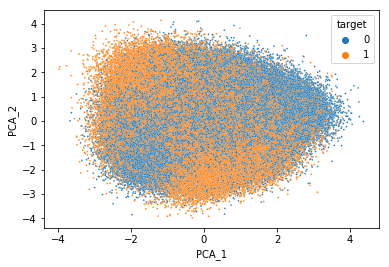

In [36]:
#converting it to df
#where the first column contribute PCA 1 , 2nd to PCA 2, ... and so on
PCA_df = pd.DataFrame({"PCA_1" : X_trainPCA[:,0], "PCA_2" : X_trainPCA[:,1], "target" : noObj_dfTrain["target"] })
sns.scatterplot(data=  PCA_df, x = "PCA_1", y = "PCA_2", hue = "target", s = 3 )

* We see that both PCA are important and are not just aligned along one axis for instance

In [37]:
#vector of variance exlained by each dimension
#print('vector of variance exlained by each dimension\n')
#print(pca.explained_variance_ratio_)
# we see there are 42 dpoints. 
#print('cumulative variance explained by first i +1 dimension \n')
#print(pca.explained_variance_ratio_.cumsum()) #returns vector 
#print(pca.n_components_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('The number of dimension it cane be reduced to : ',d)
print('Number of PC components :', pca.n_components_)

The number of dimension it cane be reduced to :  38
Number of PC components : 42


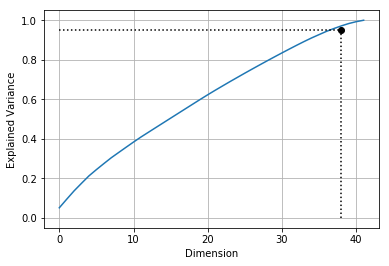

In [42]:
# need to see how many dimension it can be reduced to 
#taken from the book 
plt.plot(cumsum)
plt.xlabel("Dimension")
plt.ylabel("Explained Variance")
plt.plot([d,d], [0,0.95], "k:")
plt.plot([0,d], [0.95,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)

### Hence, all the features are important.

In [44]:
columns = ['pca_%i' % i for i in range(d)]
X_df_train_pca = pd.DataFrame(X_trainPCA[:,:d], columns = columns, index = df_train.index)
y_train = df_train["target"]
#display(X_df_train_pca.head())
#display(df_test_pca.head())

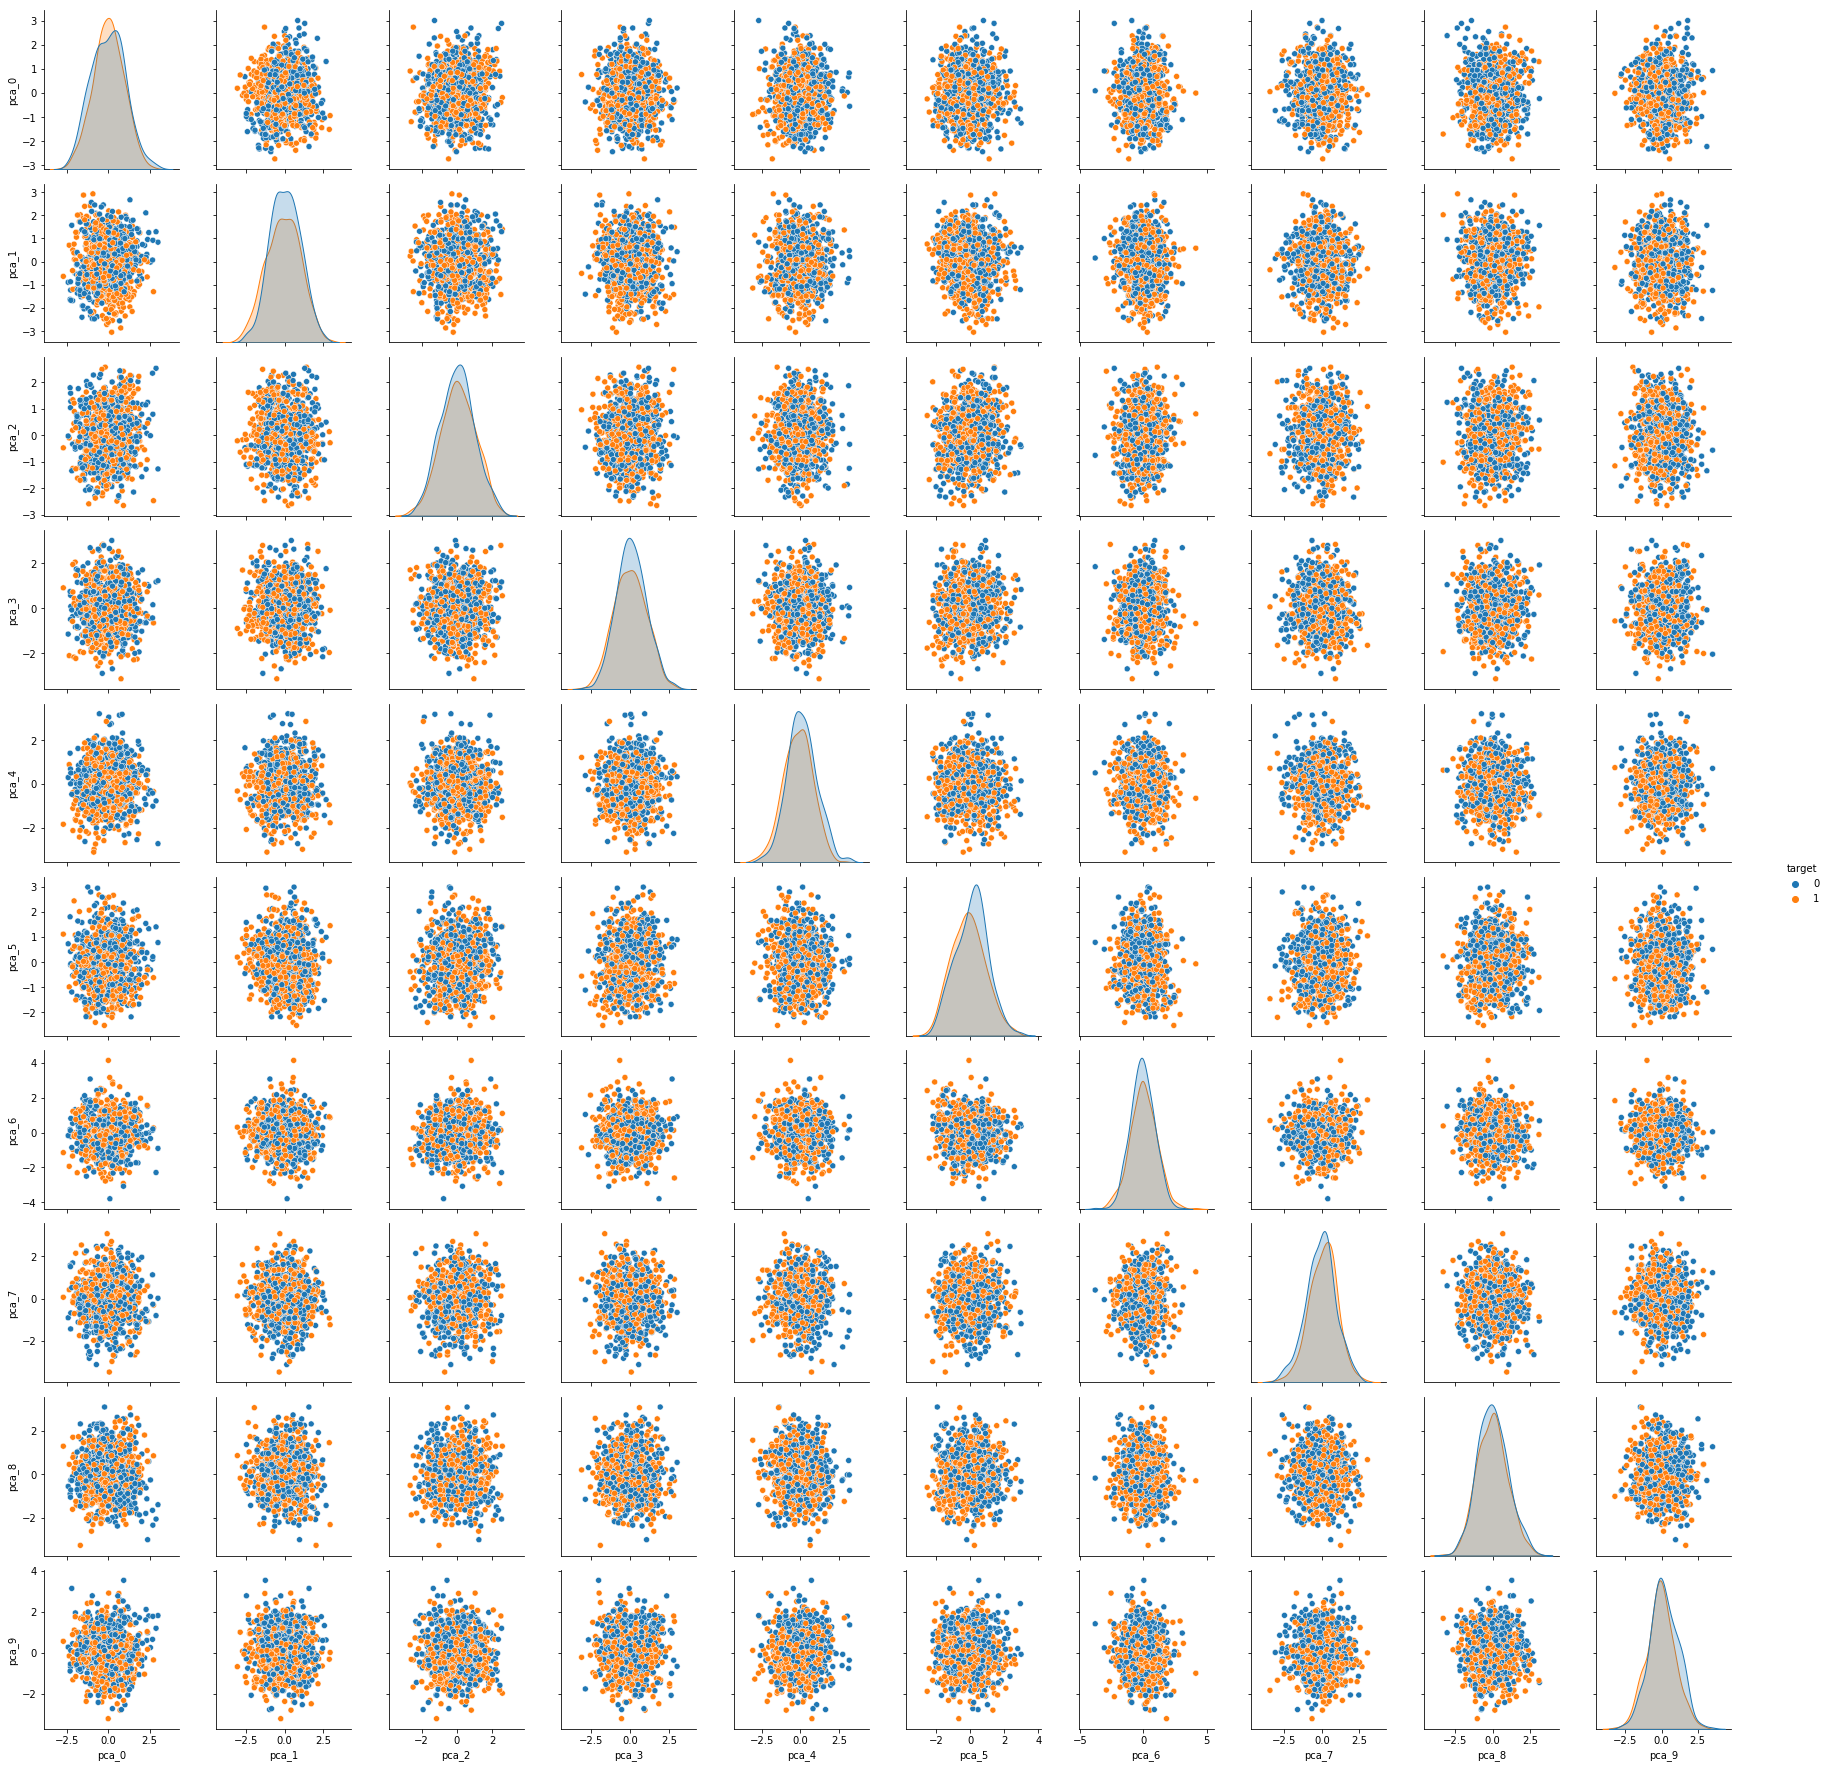

In [47]:

part1 = X_df_train_pca.iloc[:,:10] 
part1['target']=df_train['target']
sns.pairplot(data=part1.sample(1000), diag_kind='kde',hue ="target")

We notice that there is no preferred direction and all the features are important

In [72]:

#part2 = X_df_pca.iloc[:,10:20] 
#part2['target']=df['target']
#sns.pairplot(data=part2.sample(1000), diag_kind='kde',hue ="target")

In [49]:

#part3 = X_df_pca.iloc[:,20:30] 
#part3['target']=df['target']
#sns.pairplot(data=part3.sample(1000), diag_kind='kde',hue ="target")

### Feature importance - random forest classifer

In [40]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
#initialising the classifier
rfc = RandomForestClassifier(random_state=42, n_estimators=100)

In [41]:
X_train = noObj_dfTrain.drop("target", axis = 1)
y_train = df_train["target"]
#fit the model 
rfc.fit(noObj_dfTrain, y_train)
#view the feature_score
feature_score = pd.Series(rfc.feature_importances_, index = X_train.cols).sort_values(ascending = False)
#feature_score
f,ax = plt.subplots(figsize=(10,10))
sns.barplot(y = feature_score.index, x = feature_score.values, color='orange')

AttributeError: 'DataFrame' object has no attribute 'cols'

## Training a binary Classifier

In [52]:

from sklearn.linear_model import SGDClassifier
#initialising SGD classifier
sgd = SGDClassifier(random_state=42)

In [53]:
# fitting the training data set
sgd.fit(X_df_train_pca, y_train)
#predict check 
some_feature_set = X_df_train_pca.iloc[8]
sgd.predict([some_feature_set]) #checking fromm the trainingg set

array([0])

In [54]:
print(df_train.iloc[8,-1]) #which is the target variable

0


In [78]:
print('The predicted value from classifier :', sgd.predict([some_feature_set]))
print('The actual value from training dataset :', df_train.iloc[8,-1])


The predicted value from classifier : [0]
The actual value from training dataset : 0


### Cross-Validation Checks
## using classifier as well to check on the prediction 

In [59]:
from sklearn import tree
from sklearn import metrics

In [11]:
train = newDF_train.drop(['f_27'], axis = 1)
train = train.sample(frac=1).reset_index(drop = True) #shuffling the traininf dtaet which has new features without scaled


In [13]:
dataset_train = train.head(600000)
dataset_val = train.tail(300000)

In [62]:
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = [col for col in dataset_train.columns  if col != 'target' ]
#cols

In [63]:
clf.fit(dataset_train[cols], dataset_train.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
train_prediction = clf.predict(dataset_train[cols])
test_prediction = clf.predict(dataset_val[cols])

In [66]:
train_accuracy = metrics.accuracy_score(dataset_train.target,train_prediction)
test_accuracy = metrics.accuracy_score(dataset_val.target,test_prediction)
print('Training accuracy : ', train_accuracy)
print('Testing accuracy : ', test_accuracy)

Training accuracy :  0.5664433333333333
Testing accuracy :  0.5672866666666667


running a clssifier and finding the depth to get correct accuracy

In [67]:
#writing a for loop for training and testing the data
#initialise the train and test accuracy 
train_accuracies = [0.5]
test_accuracies = [0.5]

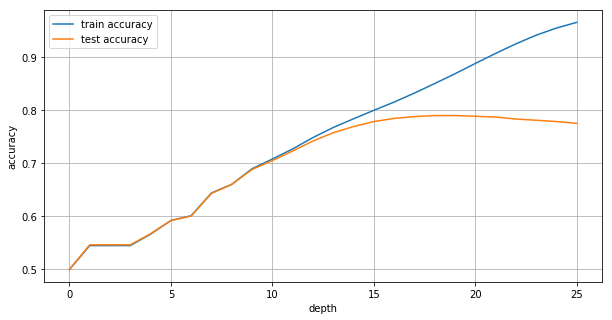

In [69]:
#initialising the for loop for classifier
for depth in range(1, 25):    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(dataset_train[cols], dataset_train.target)
    train_prediction = clf.predict(dataset_train[cols])
    test_prediction = clf.predict(dataset_val[cols])
    train_accuracy = metrics.accuracy_score(dataset_train.target,train_prediction)
    test_accuracy = metrics.accuracy_score(dataset_val.target,test_prediction)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
#creating plot
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label = "train accuracy")
plt.plot(test_accuracies, label = "test accuracy")
plt.xticks(range(0,26,5))
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

We see for depth = 10 after that the training accuracy increases whilte the test accuracy remains the same. Henc, one could choose depth = 10

In [14]:

#dataset for k-fold and classification
cols = [col for col in dataset_train.columns  if col != 'target' ]
train_kFold = newDF_train.drop('f_27', axis = 1)
train_kFold = train_kFold.sample(frac =1 ).reset_index(drop = True)
y_train_kFold = newDF_train['target']
train_kFold.shape

(900000, 43)

In [16]:
from time import process_time_ns
from sklearn import model_selection
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_list = []
y_true_list = []
roc_list, accuracy_list,feature_importance = [],[],[]
#X_train_kFold, X_val_kFold =[], []
#initiating kfold
kFold = model_selection.KFold(n_splits= 5, random_state=42) #splitting in 5 folds
#initialising the classifier
LGBM = lgb.LGBMClassifier()

#kfold.splitt - splits the indices to training nd testng 
for fold, (trn_idx, val_idx) in enumerate(kFold.split( train_kFold)):
    print("===FOLD=== ",fold)
   # print(trn_, val_)
    X_train_kFold = train_kFold.iloc[trn_idx][cols]
    y_train_kFold = train_kFold.iloc[trn_idx].target
    #print(y_train_kFold.shape)
    X_val_kFold = train_kFold.iloc[val_idx][cols]
    y_val_kFold = train_kFold.iloc[val_idx].target
    print(X_train_kFold.shape, y_train_kFold.shape)
    LGBM.fit(X_train_kFold, y_train_kFold)
    training_prediction = LGBM.predict(X_train_kFold)
    validating_prediction = LGBM.predict(X_val_kFold)
    training_kFold_accuracy = accuracy_score(y_train_kFold,training_prediction )
    testing_kFold_accuracy = accuracy_score(y_val_kFold, validating_prediction)
    y_pred_list.append(validating_prediction)
    roc_list.append(roc_auc_score(y_val_kFold,validating_prediction))
    accuracy_list.append(accuracy_score(y_val_kFold,validating_prediction))
    feature_importance.append(LGBM.feature_importances_)
    print("ROC-AUC score  : ",roc_auc_score(y_val_kFold,validating_prediction))
    print('accuracy score :', accuracy_score(y_val_kFold,validating_prediction))


===FOLD===  0
(720000, 42) (720000,)
ROC-AUC score  :  0.8887708524385589
accuracy score : 0.8890111111111111
===FOLD===  1
(720000, 42) (720000,)
ROC-AUC score  :  0.8892206294302188
accuracy score : 0.8894777777777778
===FOLD===  2
(720000, 42) (720000,)
ROC-AUC score  :  0.891672323432044
accuracy score : 0.8919555555555555
===FOLD===  3
(720000, 42) (720000,)
ROC-AUC score  :  0.8899211499417654
accuracy score : 0.8901277777777777
===FOLD===  4
(720000, 42) (720000,)
ROC-AUC score  :  0.8884808623762092
accuracy score : 0.8888333333333334


In [36]:
#print(feature_importance)
#pd.Series(rfc.feature_importances_, index = X_train.cols).sort_values(ascending = False)
#feature_score
feature_imp = pd.DataFrame(sorted(zip(LGBM.feature_importances_, X_train_kFold.columns)), columns=["Value","Feature" ]).sort_values( by = "Value", ascending=False)


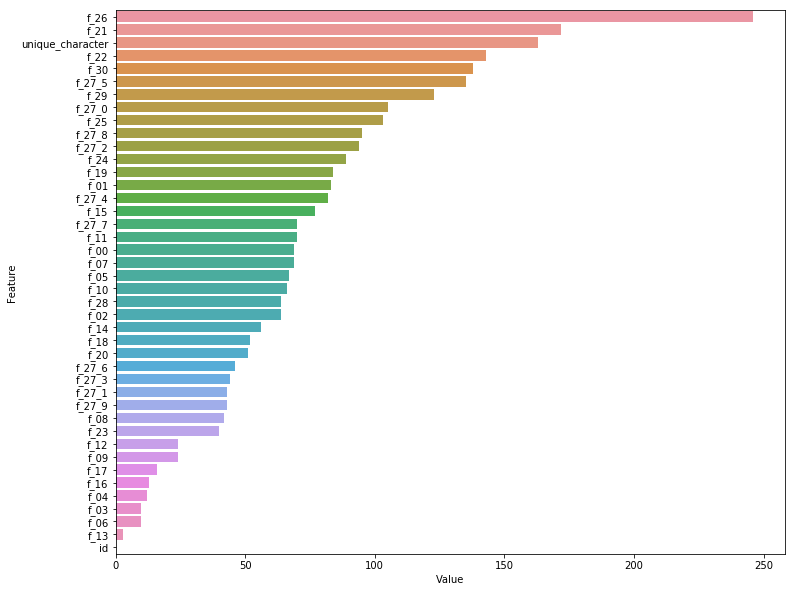

In [38]:

plt.figure(figsize =(12, 10))
sns.barplot(y = "Feature", x = "Value", data = feature_imp)

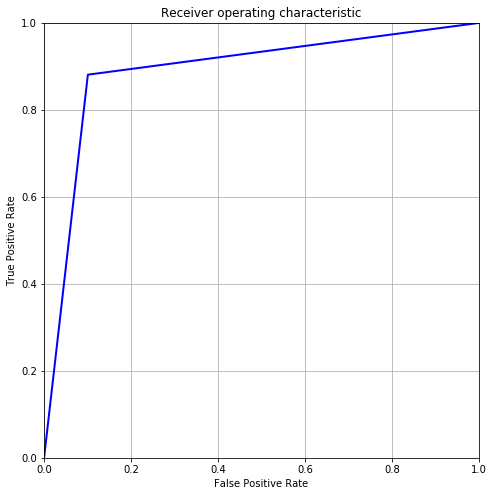

In [76]:
#plotting the roc-auc curve
from sklearn.metrics import roc_curve
plt.figure(figsize = (8,8))
fpr, tpr,_ = roc_curve(y_val_kFold,validating_prediction)
plt.plot(fpr, tpr, color = 'blue', lw =2)
plt.gca().set_aspect('equal')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.grid()
plt.show()
